In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.signal import find_peaks, peak_widths

from qutip import *


font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

In [10]:
file_path = "v2/202512_power_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
Fluo_pow1       = data["A"].to_numpy()
FWHM_pow1       = data["fwhm"].to_numpy()
I_pow1       = data["intensity"].to_numpy()
S_pow1    = data["S"].to_numpy()

Gam_pow1 = FWHM_pow1/(1+S_pow1)**.5

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("Fluo:", Fluo_pow1.shape, "→", Fluo_pow1[:5])
print("FWHM_pow:", FWHM_pow1.shape, "→", FWHM_pow1[:5])
print("I:", I_pow1.shape, "→", I_pow1[:5])
print("S:", S_pow1.shape, "→", S_pow1[:5])

,A,fwhm,intensity,S
0,300.077240,9.946400e+07,0.320397,0.049505
1,305.815098,1.067719e+08,0.320397,0.050500
2,337.995382,6.795428e+07,0.320397,0.056112
3,132.560962,1.108078e+08,0.091542,0.021281
4,171.386444,6.673294e+07,0.091542,0.027687


Fluo: (56,) → [300.07724022 305.81509767 337.99538171 132.56096206 171.38644418]
FWHM_pow: (56,) → [9.94639960e+07 1.06771883e+08 6.79542836e+07 1.10807840e+08
 6.67329400e+07]
I: (56,) → [0.32039682 0.32039682 0.32039682 0.09154195 0.09154195]
S: (56,) → [0.04950532 0.05049973 0.05611189 0.02128115 0.02768671]


In [11]:
file_path = "S_parameter_vs_temp.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_pow2       = data["Temperature [K]"].to_numpy()
I_pow2       = data["Intensity [W/cm²]"].to_numpy()
S_pow2       = data["S"].to_numpy()
FWHM_pow2    = data["FWHM [Hz]"].to_numpy()
Gam_pow2 = data["FWHM deph + FWHM0 [Hz]"].to_numpy()
Fluo_pow2    = data["Fluorescence [cps]"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_pow2.shape, "→", T_pow2[:5])
print("I:", I_pow2.shape, "→", I_pow2[:5])
print("S:", S_pow2.shape, "→", S_pow2[:5])
print("FWHM:", FWHM_pow2.shape, "→", FWHM_pow2[:5])
print("Gam_tot:", Gam_pow2.shape, "→", Gam_pow2[:5])
print("Fluo:", Fluo_pow2.shape, "→", Fluo_pow2[:5])

,Temperature [K],Intensity [W/cm²],S,FWHM [Hz],FWHM deph + FWHM0 [Hz],Fluorescence [cps]
0,4.731820,0.428243,0.108321,2.535635e+08,2.408540e+08,15550.338565
1,4.777749,0.428243,0.123954,2.635728e+08,2.486144e+08,17547.096787
2,4.490514,0.428243,0.100211,2.133204e+08,2.033736e+08,14492.044091
3,5.075639,0.856485,0.225183,3.367827e+08,3.042631e+08,29243.322029
4,4.551905,1.712970,0.394787,2.508496e+08,2.124025e+08,45034.647029


T: (49,) → [4.73181998 4.77774867 4.49051393 5.07563945 4.55190483]
I: (49,) → [0.42824258 0.42824258 0.42824258 0.85648516 1.71297031]
S: (49,) → [0.10832125 0.12395445 0.10021059 0.22518313 0.39478694]
FWHM: (49,) → [2.53563457e+08 2.63572818e+08 2.13320427e+08 3.36782713e+08
 2.50849642e+08]
Gam_tot: (49,) → [2.40853984e+08 2.48614391e+08 2.03373581e+08 3.04263100e+08
 2.12402464e+08]
Fluo: (49,) → [15550.33856457 17547.09678679 14492.04409057 29243.32202877
 45034.64702943]


In [30]:
file_path = "off_res/20250409-1233-37_power_sweep_plot_8.dat"
data = np.loadtxt(file_path, comments="#", delimiter='\t')
display(data.shape)
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
Pow_off1       = data[:, 0]
Fluo_off1       = data[:, 1]

# Jupyter Notebook cell 4 — Check the extracted arrays
print("P1:", Pow_off1.shape, "→", Pow_off1[:5])
print("F1:", Fluo_off1.shape, "→", Fluo_off1[:5])

#conversion power to intensity
NA0 = 0.7   #numerical aperture setup
waist0 = 767*1e-7/(np.pi*NA0)   #laser beam waist
setup_eff0 = 1./7.  #setup efficiency -> ask hugo
conversion_fact = 2*setup_eff0/(np.pi*waist0**2)

I_off1 = conversion_fact * Pow_off1


(2999, 6)

P1: (2999,) → [7.58232591e-06 7.58189062e-06 7.58083360e-06 7.57761028e-06
 7.57277794e-06]
F1: (2999,) → [63900. 64800. 67400. 65700. 65650.]


/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_2163/2308326860.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc1 = ax.scatter(
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_2163/2308326860.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


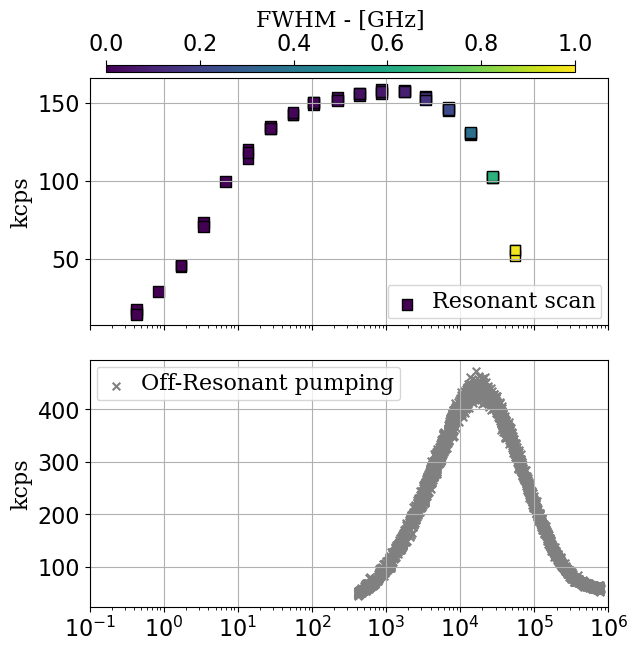

In [32]:


# -------------------------------------------------
# Figure + axes (vertical stack, shared x)
# -------------------------------------------------
fig, axes = plt.subplots(
    2, 1,
    sharex=True,
    figsize=(170/25.4, 300/25.4),   # adjust height as you like
    gridspec_kw=dict(hspace=0.14)   # tight vertical spacing
)

# =================================================
# PANEL 1 — Population vs Intensity (colored by Γ)
# =================================================
ax = axes[0]
sc1 = ax.scatter(
    I_pow2, Fluo_pow2*1e-3 ,
    c=FWHM_pow2 * 1e-9, cmap='viridis',
    s=60, edgecolor='k', marker='s', label=r"Resonant scan"
)



ax.set_xscale('log')
ax.set_xlim(1e-1, 1e5)
ax.set_ylabel(r"kcps", fontdict=font)
ax.grid()

leg = ax.legend()
for text in leg.get_texts():
    text.set_fontsize(font['size'])
    text.set_fontname(font['family'])
    text.set_weight(font['weight'])
    text.set_color(font['color'])

ax.tick_params(labelsize=font['size'], labelcolor=font['color'])

# =================================================
# PANEL 2 — Population vs Intensity (colored by Γ)
# =================================================
ax = axes[1]
sc1 = ax.scatter(
    I_off1, Fluo_off1*1e-3 ,
    c='grey',
    s=30, edgecolor='k', marker='x', label=r"Off-Resonant pumping"
)



ax.set_xscale('log')
ax.set_xlim(1e-1, 1e6)
ax.set_ylabel(r"kcps", fontdict=font)
ax.grid()

leg = ax.legend()
for text in leg.get_texts():
    text.set_fontsize(font['size'])
    text.set_fontname(font['family'])
    text.set_weight(font['weight'])
    text.set_color(font['color'])

ax.tick_params(labelsize=font['size'], labelcolor=font['color'])


# -------------------------------------------------
# Show x tick labels only on bottom panel
# -------------------------------------------------
for ax in axes[:-1]:
    ax.tick_params(labelbottom=False)


# Leave room at the top
fig.subplots_adjust(top=0.9)

# Create an independent axis for the colorbar
cax = fig.add_axes([0.15, 0.91, 0.70, 0.01])
# [left, bottom, width, height] in figure coordinates

cbar = fig.colorbar(
    sc1,
    cax=cax,
    orientation='horizontal'
)

cbar.set_label(r"FWHM - [GHz]", fontdict=font)
cbar.ax.tick_params(
    labelsize=font['size'],
    labelcolor=font['color']
)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


# -------------------------------------------------
# Layout: reserve space for top colorbar
# -------------------------------------------------
#plt.tight_layout(rect=[0, 0, 1, 0.96])  # shrink axes area a bit to leave room on top
plt.gcf().set_size_inches(170 / 25.4, 170 / 25.4)
plt.tight_layout()

#plt.savefig('DW_res_pump.pdf')